### RELU (Rectified Linear Unit)

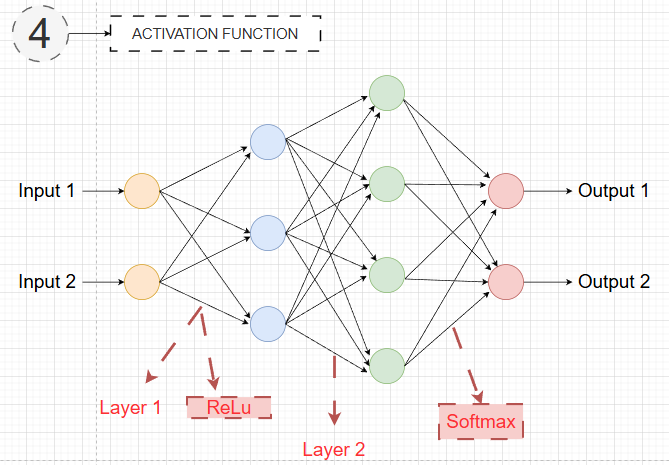

In [1]:
!pip install nnfs
!pip install matplotlib

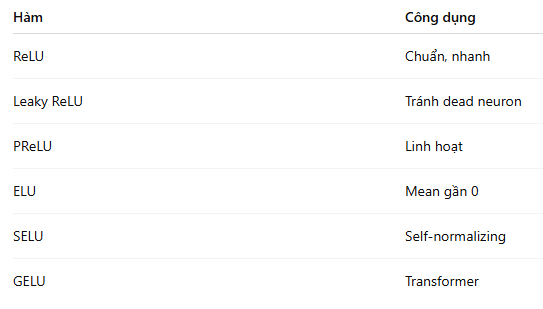

In [2]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data
nnfs.init()

In [3]:
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.dot(inputs, self.weights) + self.biases

In [4]:
class Activation_RELU:
    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.maximum(0, inputs)

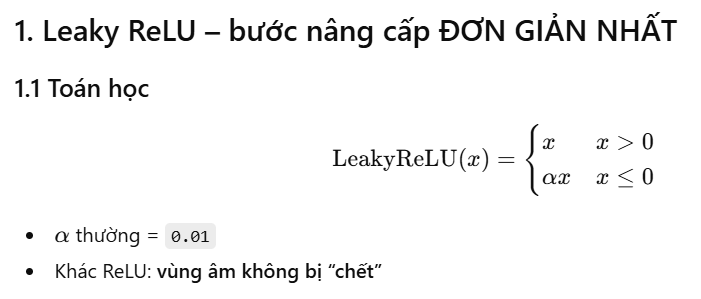

In [5]:
class Activation_LeakyRELU:
    def __init__(self, alpha=0.01):
        self.alpha = alpha

    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.where(inputs > 0, inputs, self.alpha * inputs)

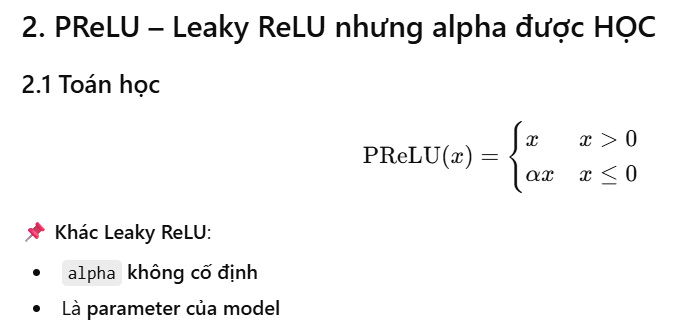

In [6]:
class Activation_PReLU:
    def __init__(self, alpha=0.01):
        self.alpha = alpha  # sẽ học sau

    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.where(inputs > 0, inputs, self.alpha * inputs)

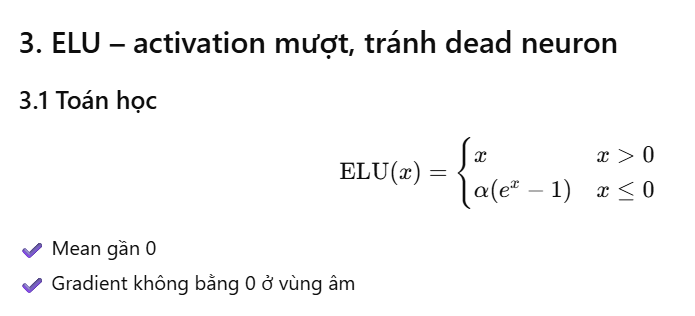

In [7]:
class Activation_ELU:
    def __init__(self, alpha=1.0):
        self.alpha = alpha

    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.where(
            inputs > 0,
            inputs,
            self.alpha * (np.exp(inputs) - 1)
        )

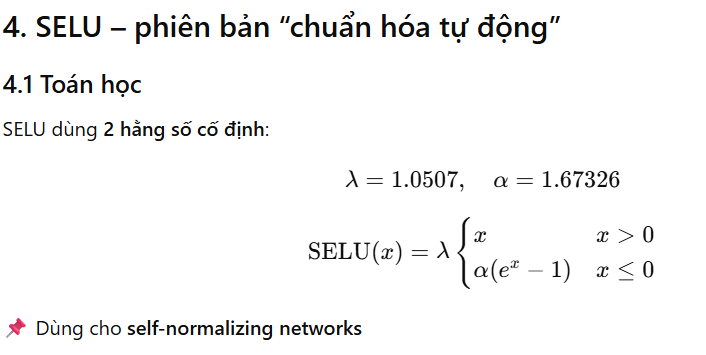

In [8]:
class Activation_SELU:
    def __init__(self):
        self.alpha = 1.67326
        self.scale = 1.0507

    def forward(self, inputs):
        self.inputs = inputs
        self.output = self.scale * np.where(
            inputs > 0,
            inputs,
            self.alpha * (np.exp(inputs) - 1)
        )

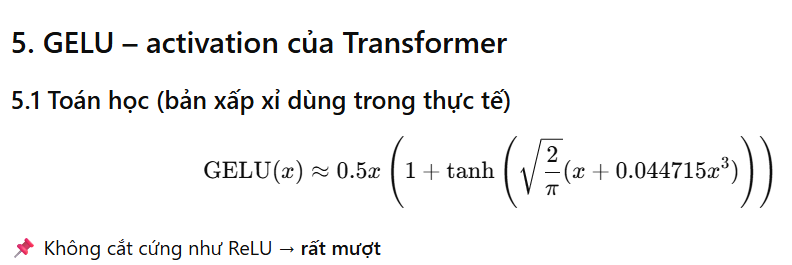

In [9]:
class Activation_GELU:
    def forward(self, inputs):
        self.inputs = inputs
        self.output = 0.5 * inputs * (
            1 + np.tanh(
                np.sqrt(2 / np.pi) *
                (inputs + 0.044715 * np.power(inputs, 3))
            )
        )


In [10]:
# Create data
X, y = spiral_data(samples=100, classes=3)

# Dense layer
dense1 = Layer_Dense(2, 3)

# Forward dense
dense1.forward(X)

print("Dense output:")
print(dense1.output[:5])

Dense output:
[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [-1.0475188e-04  1.1395361e-04 -4.7983500e-05]
 [-2.7414842e-04  3.1729150e-04 -8.6921798e-05]
 [-4.2188365e-04  5.2666257e-04 -5.5912682e-05]
 [-5.7707680e-04  7.1401405e-04 -8.9430439e-05]]


In [11]:
# ===== ReLU experiment =====
relu = Activation_RELU()
relu.forward(dense1.output)

print("\nReLU output:")
print(relu.output[:5])


ReLU output:
[[0.         0.         0.        ]
 [0.         0.00011395 0.        ]
 [0.         0.00031729 0.        ]
 [0.         0.00052666 0.        ]
 [0.         0.00071401 0.        ]]


In [12]:
# ===== Leaky ReLU experiment =====
leaky_relu = Activation_LeakyRELU(alpha=0.01)
leaky_relu.forward(dense1.output)

print("\nLeaky ReLU output:")
print(leaky_relu.output[:5])


Leaky ReLU output:
[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [-1.0475188e-06  1.1395361e-04 -4.7983497e-07]
 [-2.7414842e-06  3.1729150e-04 -8.6921796e-07]
 [-4.2188362e-06  5.2666257e-04 -5.5912682e-07]
 [-5.7707680e-06  7.1401405e-04 -8.9430438e-07]]


In [13]:
# ===== Leaky PreLU experiment =====
prelu = Activation_PReLU()
prelu.forward(dense1.output)

print("\nLeaky PreLU output:")
print(prelu.output[:5])


Leaky PreLU output:
[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [-1.0475188e-06  1.1395361e-04 -4.7983497e-07]
 [-2.7414842e-06  3.1729150e-04 -8.6921796e-07]
 [-4.2188362e-06  5.2666257e-04 -5.5912682e-07]
 [-5.7707680e-06  7.1401405e-04 -8.9430438e-07]]


In [14]:
# ===== Leaky ELU experiment =====
elu = Activation_ELU()
elu.forward(dense1.output)

print("\nLeaky ELU output:")
print(elu.output[:5])


Leaky ELU output:
[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [-1.0472536e-04  1.1395361e-04 -4.7922134e-05]
 [-2.7418137e-04  3.1729150e-04 -8.6903572e-05]
 [-4.2182207e-04  5.2666257e-04 -5.5968761e-05]
 [-5.7691336e-04  7.1401405e-04 -8.9466572e-05]]


In [15]:
# ===== Leaky SELU experiment =====
selu = Activation_SELU()
selu.forward(dense1.output)

print("\nLeaky SELU output:")
print(selu.output[:5])


Leaky SELU output:
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.84117045e-04  1.19731056e-04 -8.42516238e-05]
 [-4.82036674e-04  3.33378179e-04 -1.52784662e-04]
 [-7.41602969e-04  5.53364342e-04 -9.83983555e-05]
 [-1.01426803e-03  7.50214502e-04 -1.57290662e-04]]
